In [498]:
import pandas as pd
import numpy as np

# Scaling modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from ftfy import fix_text

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import altair as alt
from tabulate import tabulate
import plotly.express as px
import plotly.io as pio
from plotly.colors import sample_colorscale
pio.renderers.default = 'notebook'

from scipy.stats import linregress

In [451]:
# Load up data from wine.csv
wines_df = pd.read_csv('wine.csv', sep=",")

In [452]:
# Print first 5 observations
wines_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [453]:
# Get the number of missing data points per column
missing_values_count = wines_df.isnull().sum()
print(missing_values_count)

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64


<Axes: >

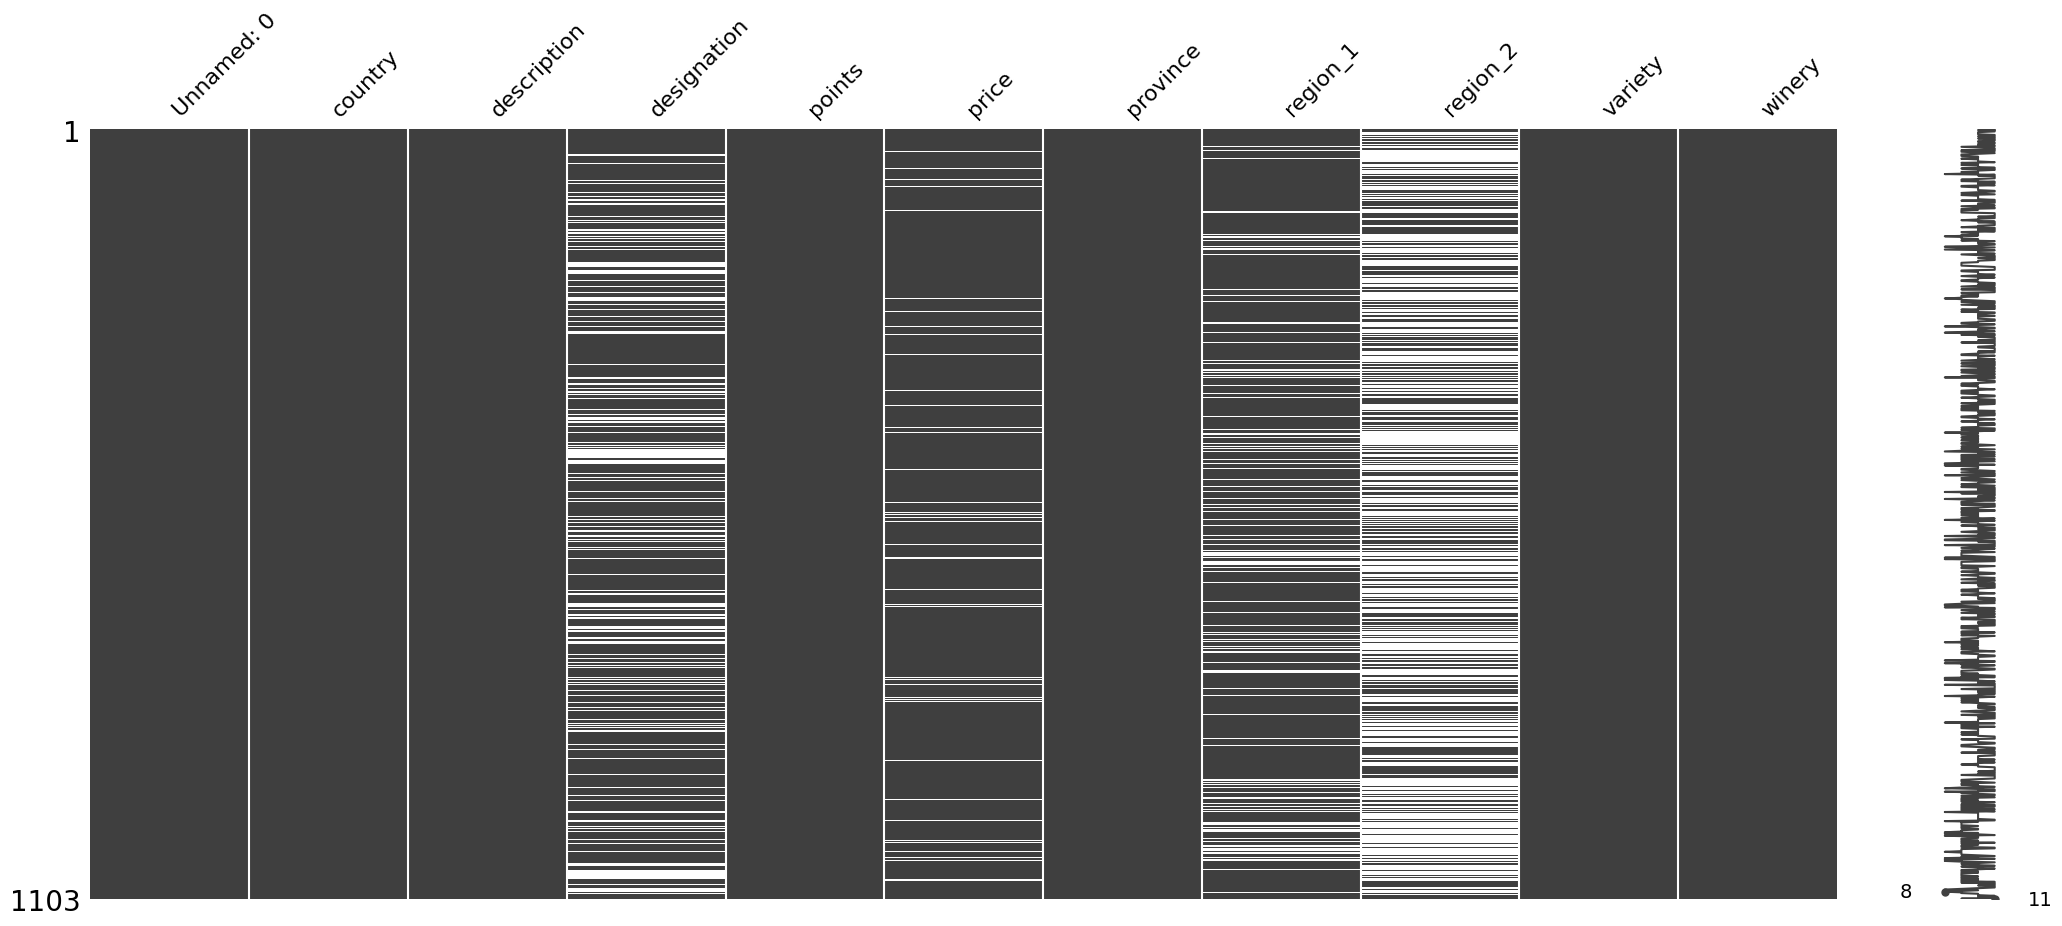

In [454]:
# Visualise missing data
msno.matrix(wines_df)

In [455]:
# Clean the data and handle missing data
# Drop the unnecessary index column
if 'Unnamed: 0' in wines_df.columns:
    wines_df = wines_df.drop(columns=['Unnamed: 0'])

# Fix encoding issues in all string columns
for col in wines_df.select_dtypes(include='object').columns:
    wines_df[col] = wines_df[col].apply(lambda x: fix_text(x) if pd.notnull(x) else x)
wines_df['variety'] = wines_df['variety'].apply(lambda x: fix_text(x) if pd.notnull(x) else x)

# Handle missing values
wines_df['designation'] = wines_df['designation'].fillna('Unknown')
wines_df['price'] = wines_df['price'].fillna('Unknown')
wines_df['region_1'] = wines_df['region_1'].fillna('Unknown')
wines_df['region_2'] = wines_df['region_2'].fillna('Unknown')

# Ensure numeric columns are actually numeric
wines_df['points'] = pd.to_numeric(wines_df['points'], errors='coerce')
wines_df['price'] = pd.to_numeric(wines_df['price'], errors='coerce')

# Strip extra whitespace in string columns
wines_df = wines_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Drop duplicates if any
wines_df = wines_df.drop_duplicates()

# Preview the cleaned data
wines_df.head()

C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\1428564326.py:22: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Unknown,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Unknown,Provence red blend,Domaine de la Bégude


In [456]:
# Check countries for duplicates
alphabetical_countries = np.sort(wines_df['country'].unique())
print(alphabetical_countries)

['Argentina' 'Australia' 'Austria' 'Bulgaria' 'Canada' 'Chile' 'Croatia'
 'France' 'Germany' 'Greece' 'Hungary' 'Israel' 'Italy' 'Moldova'
 'Morocco' 'New Zealand' 'Portugal' 'Romania' 'Slovenia' 'South Africa'
 'Spain' 'US']


In [457]:
# Check province for duplicates
alphabetical_province = np.sort(wines_df['province'].unique())
print(alphabetical_province)

['Aconcagua Valley' 'Ahr' 'Alentejano' 'Alentejo' 'Alsace' 'Andalucia'
 'Atalanti Valley' 'Baden' 'Bairrada' 'Beaujolais' 'Beira Atlantico'
 'Beiras' 'Bordeaux' 'British Columbia' 'Bulgaria' 'Burgenland' 'Burgundy'
 'Cachapoal Valley' 'California' 'Carnuntum' 'Casablanca Valley'
 'Catalonia' 'Central Spain' 'Champagne' 'Colchagua Valley'
 'Colinele Dobrogei' 'Curicó Valley' 'Dealurile Munteniei' 'Douro'
 'Duriense' 'D√£o' 'Florina' 'France Other' 'Galicia' 'Galilee'
 'Golan Heights' 'Goriska Brda' 'Guerrouane' 'Idaho' 'Italy Other'
 'Judean Hills' 'Kumeu' 'Languedoc-Roussillon' 'Levante' 'Leyda Valley'
 'Limarí Valley' 'Lisboa' 'Loire Valley' 'Lombardy' 'Maipo Valley'
 'Marchigue' 'Maule Valley' 'Mendoza Province' 'Moldova' 'Mosel' 'Nahe'
 'Nemea' 'New York' 'North Dalmatia' 'Northeastern Italy' 'Northern Spain'
 'Ontario' 'Oregon' 'Other' 'Overberg' 'Peloponnese'
 'Península de Setúbal' 'Peumo' 'Piedmont' 'Portuguese Table Wine'
 'Provence' 'Rheingau' 'Rheinhessen' 'Rhône Valley' 'Rob

In [458]:
# Fix encoding errors
wines_df['province'] = wines_df['province'].replace({
    'D√£o': 'Dão',
    'Terras do D√£o': 'Terras do Dão'
})

In [459]:
# Check wine variety to avoid duplicates
alphabetical_varieties = np.sort(wines_df['variety'].unique())
print(alphabetical_varieties)

['Agiorgitiko' 'Aglianico' 'Albariño' 'Alicante Bouschet'
 'Alsace white blend' 'Alvarinho' 'Aragonês' 'Assyrtiko' 'Baga' 'Barbera'
 'Blauburgunder' 'Blaufr√§nkisch' 'Bordeaux-style Red Blend'
 'Bordeaux-style White Blend' 'Cabernet Franc' 'Cabernet Sauvignon'
 'Cabernet Sauvignon-Cabernet Franc' 'Cabernet Sauvignon-Merlot'
 'Cabernet Sauvignon-Syrah' 'Carignane' 'Carmenère' 'Champagne Blend'
 'Charbono' 'Chardonnay' 'Chasselas' 'Chenin Blanc'
 'Chenin Blanc-Chardonnay' 'Duras' 'Frappato' 'Friulano' 'Früburgunder'
 'Fumé Blanc' 'Furmint' 'G-S-M' 'Gamay' 'Garganega' 'Garnacha'
 'Gewürztraminer' 'Glera' 'Godello' 'Greco' 'Grenache' 'Grenache-Syrah'
 'Gros Manseng' 'Gros and Petit Manseng' 'Grüner Veltliner' 'Kekfrankos'
 'Lemberger' 'Malagouzia' 'Malbec' 'Malbec-Cabernet Sauvignon'
 'Malbec-Merlot' 'Malvasia Bianca' 'Mavrud' 'Mencía' 'Meritage' 'Merlot'
 'Merlot-Malbec' 'Monastrell' 'Moscato' 'Mourvèdre' 'Muscat' 'Nebbiolo'
 'Negrette' 'Negroamaro' 'Nerello Mascalese' "Nero d'Avola" 'Pal

In [460]:
# Handle duplicates by standardizing names
variety_replacements = {
    'Petite Verdot': 'Petit Verdot',
    'Shiraz': 'Syrah',
    'Merlot-Cabernet Sauvignon': 'Cabernet Sauvignon-Merlot',
    'Cabernet Franc-Cabernet Sauvignon': 'Cabernet Sauvignon-Cabernet Franc',
    'Malbec-Merlot': 'Merlot-Malbec',  
    'Syrah-Grenache': 'Grenache-Syrah',
    'Blaufr√§nkisch': 'Blaufränkisch',
    'Sauvignon': 'Sauvignon Blanc',
    'Pinot Grigio': 'Pinot Gris',
    'Blauburgunder': 'Pinot Noir',
    'Früburgunder': 'Pinot Noir',
    'Pinot Bianco': 'Pinot Blanc',
    'Lemberger': 'Blaufränkisch'
}
wines_df['variety'] = wines_df['variety'].replace(variety_replacements)
wines_df['variety'] = wines_df['variety'].str.strip().str.title()

alphabetical_varieties = np.sort(wines_df['variety'].unique())
print(alphabetical_varieties)

['Agiorgitiko' 'Aglianico' 'Albariño' 'Alicante Bouschet'
 'Alsace White Blend' 'Alvarinho' 'Aragonês' 'Assyrtiko' 'Baga' 'Barbera'
 'Blaufränkisch' 'Bordeaux-Style Red Blend' 'Bordeaux-Style White Blend'
 'Cabernet Franc' 'Cabernet Sauvignon' 'Cabernet Sauvignon-Cabernet Franc'
 'Cabernet Sauvignon-Merlot' 'Cabernet Sauvignon-Syrah' 'Carignane'
 'Carmenère' 'Champagne Blend' 'Charbono' 'Chardonnay' 'Chasselas'
 'Chenin Blanc' 'Chenin Blanc-Chardonnay' 'Duras' 'Frappato' 'Friulano'
 'Fumé Blanc' 'Furmint' 'G-S-M' 'Gamay' 'Garganega' 'Garnacha'
 'Gewürztraminer' 'Glera' 'Godello' 'Greco' 'Grenache' 'Grenache-Syrah'
 'Gros And Petit Manseng' 'Gros Manseng' 'Grüner Veltliner' 'Kekfrankos'
 'Malagouzia' 'Malbec' 'Malbec-Cabernet Sauvignon' 'Malvasia Bianca'
 'Mavrud' 'Mencía' 'Meritage' 'Merlot' 'Merlot-Malbec' 'Monastrell'
 'Moscato' 'Mourvèdre' 'Muscat' 'Nebbiolo' 'Negrette' 'Negroamaro'
 'Nerello Mascalese' "Nero D'Avola" 'Palomino' 'Petit Verdot'
 'Petite Sirah' 'Picpoul' 'Pinot Blanc'

In [461]:
# Check regions for duplicates
alphabetical_region1 = np.sort(wines_df['region_1'].unique())
print(alphabetical_region1)

['Adelaida District' 'Adelaide Hills' 'Agrelo' 'Alexander Valley'
 'Aloxe-Corton' 'Alsace' 'Alta Langa' 'Alto Adige'
 'Alto Valle del Río Negro' 'Amador County'
 'Amarone della Valpolicella Classico' 'Anderson Valley'
 'Applegate Valley' 'Argentina' 'Arroyo Grande Valley' 'Arroyo Seco'
 'Atlas Peak' 'Ballard Canyon' 'Bandol' 'Barbaresco' "Barbera d'Alba"
 "Barbera d'Asti Superiore" 'Barolo' 'Beamsville Bench' 'Beaune'
 'Ben Lomond Mountain' 'Bergerac Rosé' 'Bergerac Sec' 'Bierzo'
 'Blaye Côtes de Bordeaux' 'Bolgheri' 'Bordeaux' 'Bordeaux Blanc'
 'Bordeaux Rosé' 'Bordeaux Supérieur' 'Brunello di Montalcino' 'Buzet'
 'Cafayate' 'Cahors' 'California' 'Calistoga' 'Carmel Valley' 'Carneros'
 'Carneros-Napa Valley' 'Cava' 'Central Coast' 'Chablis' 'Champagne'
 'Chassagne-Montrachet' 'Chehalem Mountains' 'Chianti Classico'
 'Ch√¢teauneuf-du-Pape' 'Cigales' 'Clear Lake' 'Clos de Vougeot' 'Collio'
 'Columbia Gorge (WA)' 'Columbia Valley (WA)' 'Coombsville' 'Cornas'
 'Corton' 'Coteaux Bourguigno

In [462]:
# Fix known encoding issues
wines_df['region_1'] = wines_df['region_1'].replace({
    'Manzanilla-Sanl√∫car de Barrameda': 'Manzanilla-Sanlúcar de Barrameda',
    'Luj√°n de Cuyo': 'Luján de Cuyo',
    'Ch√¢teauneuf-du-Pape': 'Châteauneuf-du-Pape'
})

In [463]:
# Check regions for duplicates
alphabetical_region2 = np.sort(wines_df['region_2'].unique())
print(alphabetical_region2)

['California Other' 'Central Coast' 'Central Valley' 'Columbia Valley'
 'Finger Lakes' 'Long Island' 'Mendocino/Lake Counties' 'Napa'
 'Napa-Sonoma' 'New York Other' 'North Coast' 'Oregon Other'
 'Sierra Foothills' 'Sonoma' 'South Coast' 'Southern Oregon' 'Unknown'
 'Washington Other' 'Willamette Valley']


In [464]:
# Remove 'other' from naming
wines_df['region_2'] = wines_df['region_2'].replace({
    'California Other': 'California',
    'New York Other': 'New York',
    'Oregon Other': 'Oregon',
    'Washington Other': 'Washington'
})

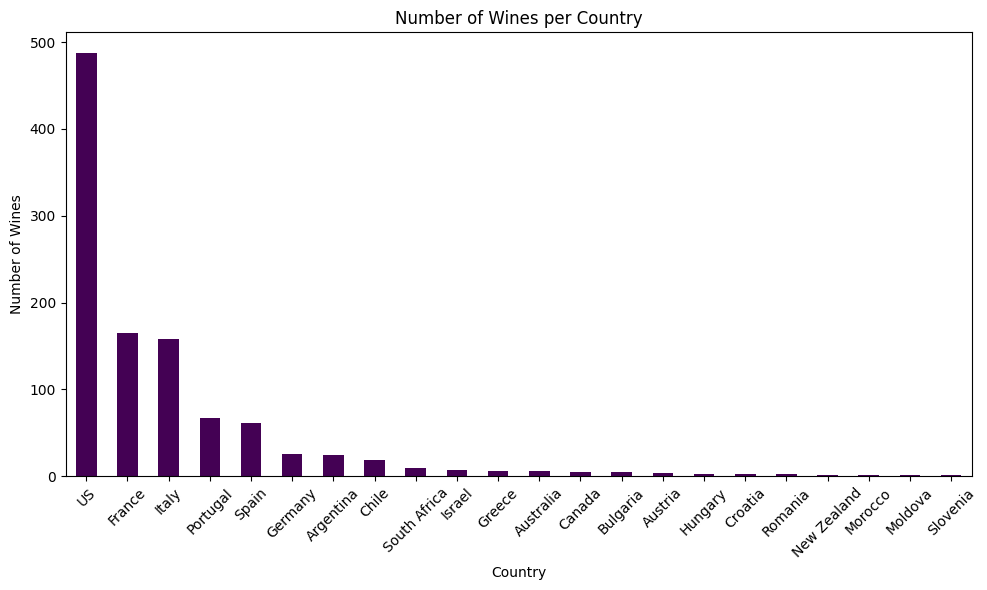

In [518]:
# Plot as a bar chart of wines per country
country_counts = wines_df['country'].value_counts()
dark_blue = "#440154" 
country_counts.plot(kind='bar', figsize=(10,6), title='Number of Wines per Country', color=dark_blue)

plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter for American wines
us_wines = wines_df[wines_df['country'] == 'US']

# Drop rows where region_1 or region_2 is missing
us_wines = us_wines.dropna(subset=['province', 'region_2'])

fig = px.sunburst(
    us_wines,
    path=['province', 'region_2'],
    values=None,  # Will count occurrences
    title='US Wine Regions: Province and Region 2',
    width=800,   
    height=800 
)

fig.update_layout(
    title={
        'text': 'US Wine Regions: Province and Region 2',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'color': 'black'
        }
    }
)

fig.show()

In [547]:
# Sort the wines by 'points' in descending order
top_wines = wines_df.sort_values(by='points', ascending=False)

# Select relevant columns to display
top_wines_table = top_wines[['variety', 'winery', 'country', 'province', 'points', 'price']].head(10)

# Declare headers
headers = ['Variety', 'Winery', 'Country', 'Province', 'Points', 'Price']

# Display the table
print(tabulate(top_wines_table, headers=headers, tablefmt='fancy_grid', showindex=False))


╒════════════════════╤═════════════════════════╤═══════════╤══════════════════╤══════════╤═════════╕
│ Variety            │ Winery                  │ Country   │ Province         │   Points │   Price │
╞════════════════════╪═════════════════════════╪═══════════╪══════════════════╪══════════╪═════════╡
│ Tinta De Toro      │ Bodega Carmen Rodríguez │ Spain     │ Northern Spain   │       96 │     110 │
├────────────────────┼─────────────────────────┼───────────┼──────────────────┼──────────┼─────────┤
│ Pinot Noir         │ Ponzi                   │ US        │ Oregon           │       96 │      65 │
├────────────────────┼─────────────────────────┼───────────┼──────────────────┼──────────┼─────────┤
│ Sauvignon Blanc    │ Macauley                │ US        │ California       │       96 │      90 │
├────────────────────┼─────────────────────────┼───────────┼──────────────────┼──────────┼─────────┤
│ Cabernet Sauvignon │ Heitz                   │ US        │ California       │       96 │ 

In [468]:
# Average quality score for any wine
avg_score = wines_df['points'].mean()
print(avg_score)

89.69934024505184


In [480]:
# Average quality score per country
avg_scores = wines_df.groupby('country')['points'].mean().sort_values(ascending=False)
print(avg_scores.head(10))

country
New Zealand    94.000000
Austria        93.000000
Morocco        93.000000
Hungary        91.000000
Germany        90.538462
Canada         90.400000
Spain          90.032787
Slovenia       90.000000
Moldova        90.000000
US             89.915811
Name: points, dtype: float64


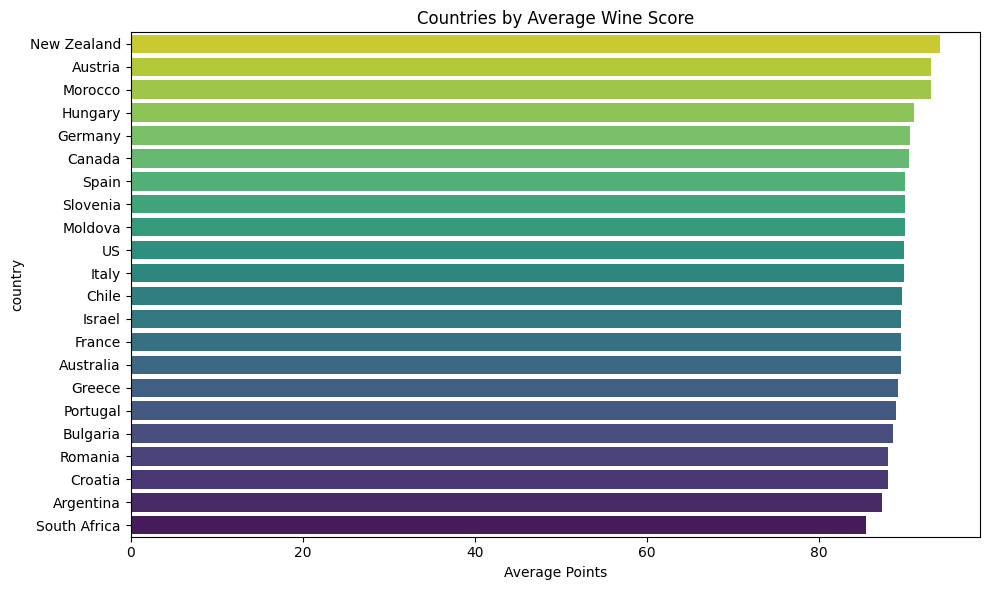

In [507]:
# Average quality score per country
avg_scores = wines_df.groupby('country')['points'].mean().sort_values(ascending=False)

avg_scores_df = avg_scores.reset_index()
avg_scores_df.columns = ['country', 'avg_points']

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_df, y='country', x='avg_points', hue='country', palette=sns.color_palette("viridis", len(avg_scores_df))[::-1])
plt.xlabel('Average Points')
plt.title('Countries by Average Wine Score')
plt.tight_layout()
plt.show()


In [550]:
avg_by_country = wines_df.groupby('country')['points'].mean().reset_index()

fig = px.choropleth(
    avg_by_country,
    locations='country',
    locationmode='country names',
    color='points',
    color_continuous_scale='Viridis',
    title='Average Wine Quality by Country'
)
fig.update_layout(
    title={
        'text': 'Average Wine Quality by Country',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'font': {
            'color': 'black'
        }
    }
)
fig.show()


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\916196635.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




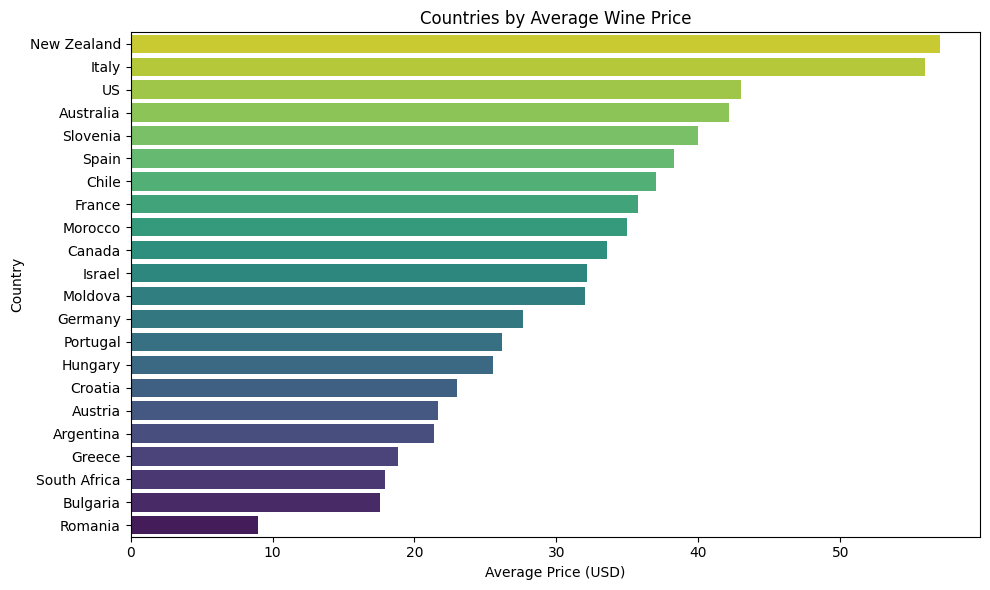

In [505]:
avg_price_country = wines_df.groupby('country')['price'].mean().sort_values(ascending=False).dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_country.values, y=avg_price_country.index, palette=sns.color_palette("viridis", len(avg_scores_df))[::-1])
plt.title('Countries by Average Wine Price')
plt.xlabel('Average Price (USD)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\1296141410.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\1296141410.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




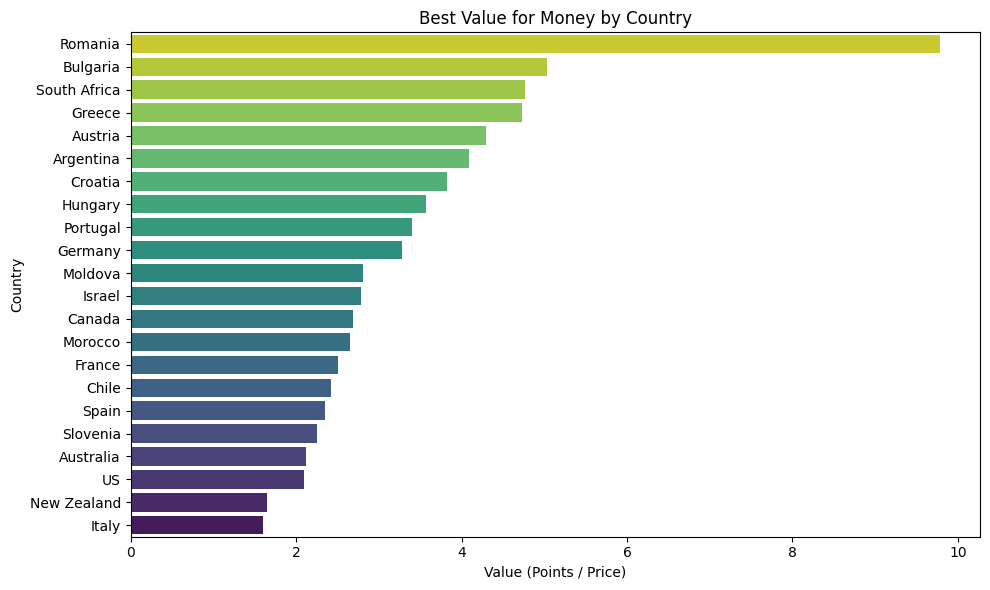

In [529]:
value_country = wines_df.groupby('country').apply(
    lambda x: x['points'].mean() / x['price'].mean()
).sort_values(ascending=False).dropna()

plt.figure(figsize=(10, 6))
sns.barplot(x=value_country.values, y=value_country.index, palette=sns.color_palette("viridis", len(avg_scores_df))[::-1])
plt.title('Best Value for Money by Country')
plt.xlabel('Value (Points / Price)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [553]:
# Calculate average points per country
avg_points_per_country = wines_df.groupby('country')['points'].mean()

# Find the country with the lowest average
lowest_avg = avg_points_per_country.min()
lowest_country = avg_points_per_country.idxmin()

# Show result
print(f"Country with the lowest average score: {lowest_country} ({lowest_avg:.1f})")


Country with the lowest average score: South Africa (85.4)


In [554]:
# Create sunburst chart
fig = px.sunburst(
    us_wines,
    path=['province', 'region_2'],
    values=None,
    title='US Wine Regions: Province and Region 2',
    width=800,
    height=800
)

# Update layout to center the title and set the font color to black
fig.update_layout(
    title={
        'text': 'US Wine Regions: Province and Region 2',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'color': 'black'
        }
    }
)

fig.show()


In [564]:
# Group by province and aggregate data
wine_stats = wines_df.groupby('province').agg(
    wine_count=('points', 'count'),
    avg_points=('points', 'mean')
).reset_index()

# Create treemap
fig = px.treemap(
    wine_stats,
    path=['province'],  # Optional: add 'country' if you want a hierarchy
    values='wine_count',
    color='avg_points',
    color_continuous_scale='RdBu',
    title='Wine Count by Province (Colored by Average Quality)',
    hover_data={'avg_points': ':.2f', 'wine_count': True}
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


In [541]:
# Calculate average points per province
avg_scores = wines_df.groupby('province')['points'].mean()

# Calculate counts per province
counts = wines_df['province'].value_counts()

# Combine into one DataFrame
province_stats = pd.DataFrame({
    'Average Score': avg_scores,
    'Count': counts
}).reset_index()

province_stats.columns = ['Province', 'Average Score', 'Count']
filtered = province_stats[province_stats['Count'] >= 5]

# Sort by average score descending and take top 15
top15_provinces = filtered.sort_values(by='Average Score', ascending=False).head(15)
top15_provinces['Average Score'] = top15_provinces['Average Score'].round(1)

# Print table with tabulate
print(tabulate(top15_provinces, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════╤═════════════════╤═════════╕
│ Province           │   Average Score │   Count │
╞════════════════════╪═════════════════╪═════════╡
│ Provence           │            93.6 │      10 │
├────────────────────┼─────────────────┼─────────┤
│ Alsace             │            91.6 │      22 │
├────────────────────┼─────────────────┼─────────┤
│ Northeastern Italy │            91.3 │      11 │
├────────────────────┼─────────────────┼─────────┤
│ Northern Spain     │            90.9 │      33 │
├────────────────────┼─────────────────┼─────────┤
│ Oregon             │            90.9 │      75 │
├────────────────────┼─────────────────┼─────────┤
│ Mosel              │            90.5 │      17 │
├────────────────────┼─────────────────┼─────────┤
│ Piedmont           │            90.4 │      58 │
├────────────────────┼─────────────────┼─────────┤
│ Colchagua Valley   │            90.2 │       8 │
├────────────────────┼─────────────────┼─────────┤
│ Burgundy           │         

In [546]:
# Calculate average points per wine variety
avg_scores = wines_df.groupby('variety')['points'].mean()

# Calculate counts per province
counts = wines_df['variety'].value_counts()

# Combine into one DataFrame
province_stats = pd.DataFrame({
    'Average Score': avg_scores,
    'Count': counts
}).reset_index()

province_stats.columns = ['Variety', 'Average Score', 'Count']
filtered = province_stats[province_stats['Count'] >= 5]

# Sort by average score descending and take top 15
top15_variety = filtered.sort_values(by='Average Score', ascending=False).head(15)
top15_variety['Average Score'] = top15_variety['Average Score'].round(1)

# Print table with tabulate
print(tabulate(top15_variety, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════════════════╤═════════════════╤═════════╕
│ Variety               │   Average Score │   Count │
╞═══════════════════════╪═════════════════╪═════════╡
│ Tinta De Toro         │            94.2 │       6 │
├───────────────────────┼─────────────────┼─────────┤
│ Pinot Noir            │            90.9 │     127 │
├───────────────────────┼─────────────────┼─────────┤
│ Riesling              │            90.8 │      50 │
├───────────────────────┼─────────────────┼─────────┤
│ Syrah                 │            90.6 │      35 │
├───────────────────────┼─────────────────┼─────────┤
│ Tempranillo Blend     │            90.4 │       8 │
├───────────────────────┼─────────────────┼─────────┤
│ Nebbiolo              │            90.3 │      54 │
├───────────────────────┼─────────────────┼─────────┤
│ Zinfandel             │            90   │      23 │
├───────────────────────┼─────────────────┼─────────┤
│ Albariño              │            90   │       7 │
├───────────────────────┼───

In [535]:
unique_varieties = wines_df['variety'].nunique()
print(f"There are {unique_varieties} unique wine varieties.")

There are 114 unique wine varieties.


In [543]:
# Step 1: Get value counts
raw_counts = wines_df['variety'].value_counts()

# Step 2: Separate top 15 and group the rest
top_15 = raw_counts[:15]
other_sum = raw_counts[15:].sum()

# Step 3: Combine into one Series
top_15_with_other = top_15.copy()
top_15_with_other['Other'] = other_sum

# Step 4: Create count DataFrame
pie_df = top_15_with_other.reset_index()
pie_df.columns = ['variety', 'count']

# Step 5: Calculate average points for top 15 varieties
avg_points = wines_df.groupby('variety')['points'].mean().round(1)
avg_points = avg_points[top_15.index]  # only top 15, ignore "Other"

# Step 6: Merge with pie_df (excluding "Other" for avg points)
pie_df = pie_df.merge(avg_points.reset_index(), on='variety', how='left')
pie_df.rename(columns={'points': 'avg_points'}, inplace=True)

# Step 7: Custom hover text
pie_df['hover_text'] = pie_df.apply(
    lambda row: f"{row['variety']}<br>Count: {row['count']}<br>Avg Points: {row['avg_points']}" if pd.notna(row['avg_points']) 
    else f"{row['variety']}<br>Count: {row['count']}", 
    axis=1
)

# Step 8: Plot
fig = px.pie(
    pie_df,
    names='variety',
    values='count',
    title='Top 15 Wine Varieties + Other',
    hover_data=['hover_text'],
    hole=0.0,
)

# Show only custom hover text
fig.update_traces(textinfo='percent', hovertemplate='%{customdata[0]}')

# Optional: Center and style the title
fig.update_layout(
    title={'x': 0.5, 'font': {'color': 'black'}}
)

fig.show()


In [568]:
# Step 1: Calculate average score per variety and count per variety
variety_stats = wines_df.groupby('variety').agg(
    avg_points=('points', 'mean'),
    count=('points', 'count')
).reset_index()


# Step 2: Sort by average score and get top 15
top_15_avg = variety_stats.sort_values(by='avg_points', ascending=False).head(15)

# Step 3: Mark all others as "Other" and sum their counts
top_15_names = top_15_avg['variety']
wines_df['variety_modified'] = wines_df['variety'].apply(lambda x: x if x in top_15_names.values else 'Other')

# Step 4: Recalculate counts with modified variety column
pie_df = wines_df.groupby('variety_modified').agg(
    count=('points', 'count'),
    avg_points=('points', 'mean')
).reset_index()

# Step 5: Create custom hover text
pie_df['hover_text'] = pie_df.apply(
    lambda row: f"{row['variety_modified']}<br>Count: {row['count']}<br>Avg Points: {row['avg_points']:.1f}",
    axis=1
)

# Step 6: Plot
fig = px.pie(
    pie_df,
    names='variety_modified',
    values='count',
    title='Top 15 Wine Varieties by Average Points (+ Other)',
    hover_data=['hover_text'],
    hole=0.0
)

# Step 7: Use custom hover text only
fig.update_traces(
    textinfo='none',  # disables labels like % or name
    hovertemplate='%{customdata[0]}'  # uses only your custom hover text
)

# Step 8: Center the title
fig.update_layout(
    title={'x': 0.5, 'font': {'color': 'black'}},
    coloraxis_showscale=False
)

fig.show()


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\2463887663.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




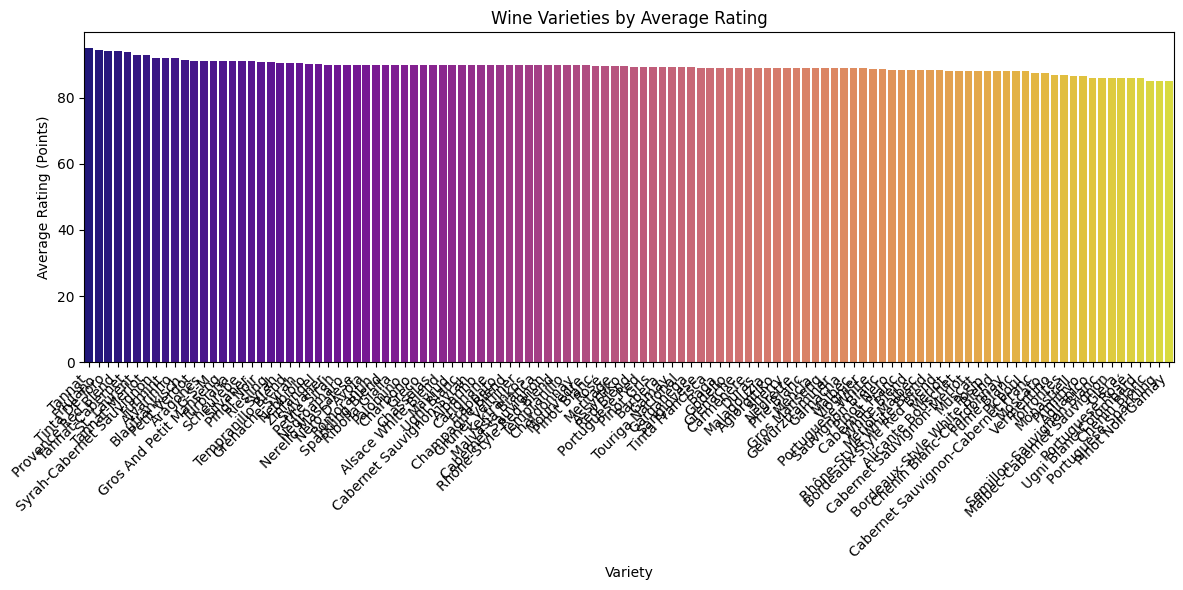

In [533]:
# Average score per variety
avg_variety = wines_df.groupby('variety')['points'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_variety.index, y=avg_variety.values, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Wine Varieties by Average Rating')
plt.ylabel('Average Rating (Points)')
plt.xlabel('Variety')
plt.tight_layout()
plt.show()

C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\3876702559.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\3876702559.py:28: UserWarning:


The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.



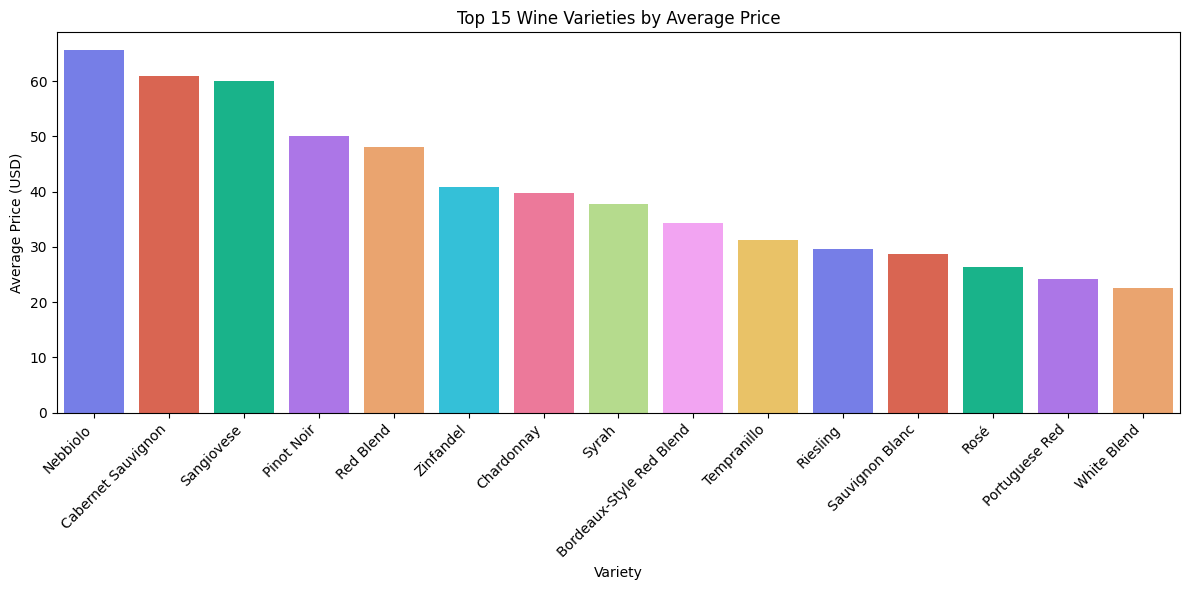

In [571]:
# Step 1: Group by variety and calculate count and average price
variety_stats = wines_df.groupby('variety').agg(
    avg_price=('price', 'mean'),
    count=('price', 'count')
).dropna()

custom_colors = [
    '#636EFA',  # blue
    '#EF553B',  # red-orange
    '#00CC96',  # teal
    '#AB63FA',  # purple
    '#FFA15A',  # orange
    '#19D3F3',  # light blue
    '#FF6692',  # pink
    '#B6E880',  # light green
    '#FF97FF',  # magenta
    '#FECB52'   # yellow
]

# Step 2: Filter to only varieties with at least 20 wines
variety_stats = variety_stats[variety_stats['count'] >= 20]

# Step 3: Sort by average price and get top 15
top_15_price_variety = variety_stats.sort_values(by='avg_price', ascending=False).head(15)

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_price_variety.index, y=top_15_price_variety['avg_price'], palette=custom_colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Wine Varieties by Average Price')
plt.ylabel('Average Price (USD)')
plt.xlabel('Variety')
plt.tight_layout()
plt.show()


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\462554749.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\462554749.py:28: UserWarning:


The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.



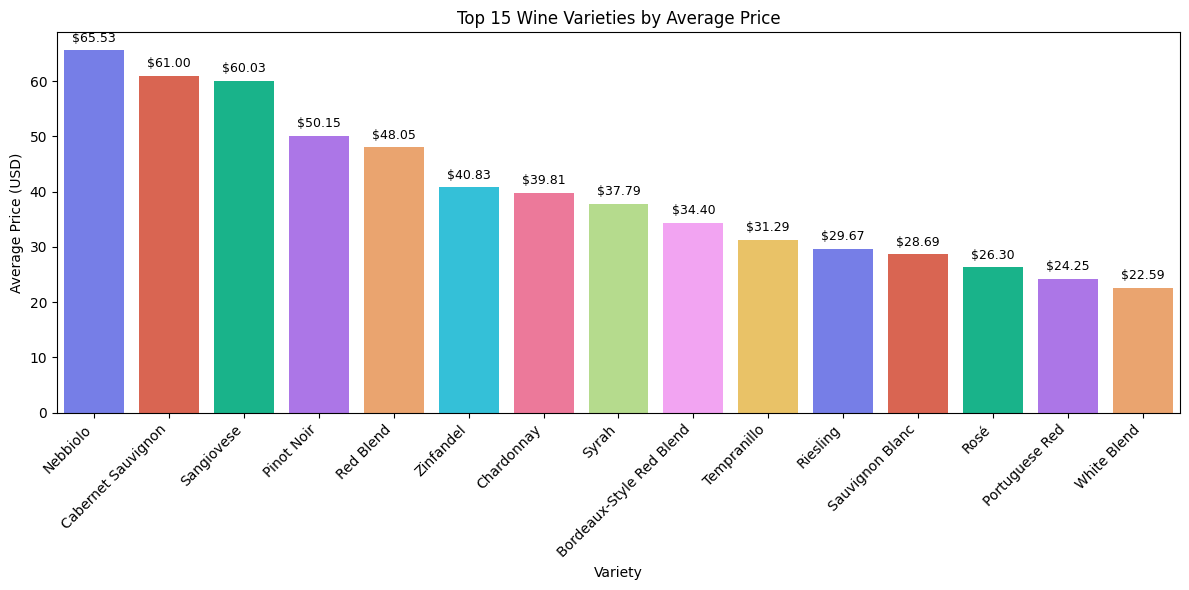

In [572]:
# Step 1: Group by variety and calculate count and average price
variety_stats = wines_df.groupby('variety').agg(
    avg_price=('price', 'mean'),
    count=('price', 'count')
).dropna()

custom_colors = [
    '#636EFA',  # blue
    '#EF553B',  # red-orange
    '#00CC96',  # teal
    '#AB63FA',  # purple
    '#FFA15A',  # orange
    '#19D3F3',  # light blue
    '#FF6692',  # pink
    '#B6E880',  # light green
    '#FF97FF',  # magenta
    '#FECB52'   # yellow
]

# Step 2: Filter to only varieties with at least 20 wines
variety_stats = variety_stats[variety_stats['count'] >= 20]

# Step 3: Sort by average price and get top 15
top_15_price_variety = variety_stats.sort_values(by='avg_price', ascending=False).head(15)

# Step 4: Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x=top_15_price_variety.index,
    y=top_15_price_variety['avg_price'],
    palette=custom_colors
)

# Add text labels above each bar
for index, value in enumerate(top_15_price_variety['avg_price']):
    plt.text(
        x=index,
        y=value + 1,  # Slightly above the bar
        s=f"${value:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Wine Varieties by Average Price')
plt.ylabel('Average Price (USD)')
plt.xlabel('Variety')
plt.tight_layout()
plt.show()


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\688142441.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\688142441.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




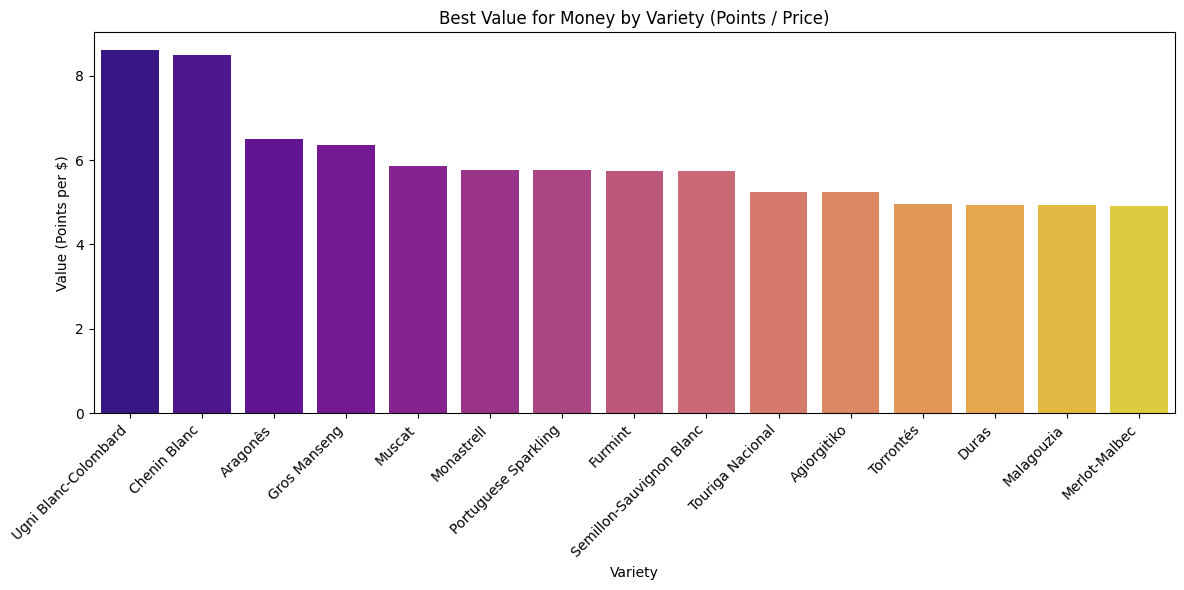

In [531]:
value_variety = wines_df.groupby('variety').apply(
    lambda x: x['points'].mean() / x['price'].mean()
).sort_values(ascending=False).dropna().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=value_variety.index, y=value_variety.values, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Best Value for Money by Variety (Points / Price)')
plt.ylabel('Value (Points per $)')
plt.xlabel('Variety')
plt.tight_layout()
plt.show()


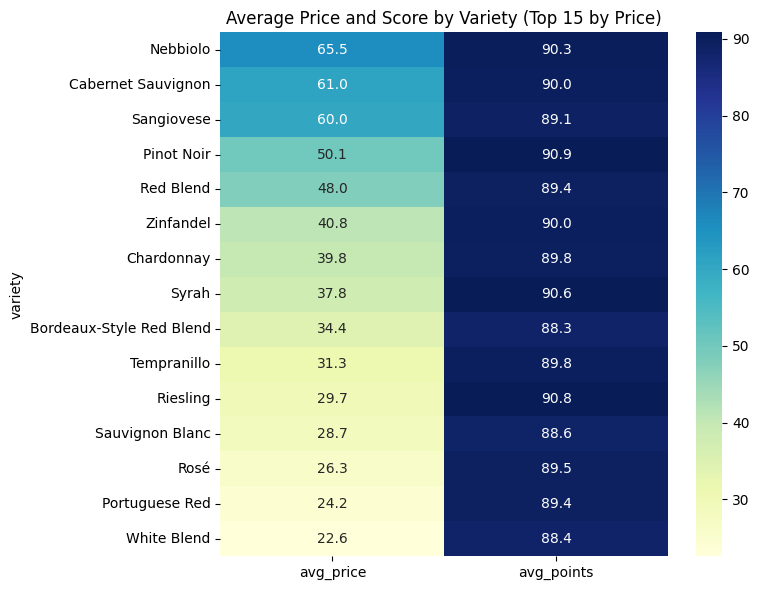

In [576]:
pivot = variety_stats[['avg_price', 'avg_points']].copy()
pivot = pivot.sort_values(by='avg_price', ascending=False).head(15)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Price and Score by Variety (Top 15 by Price)')
plt.tight_layout()
plt.show()


C:\Users\isabe\AppData\Local\Temp\ipykernel_4604\3685552930.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




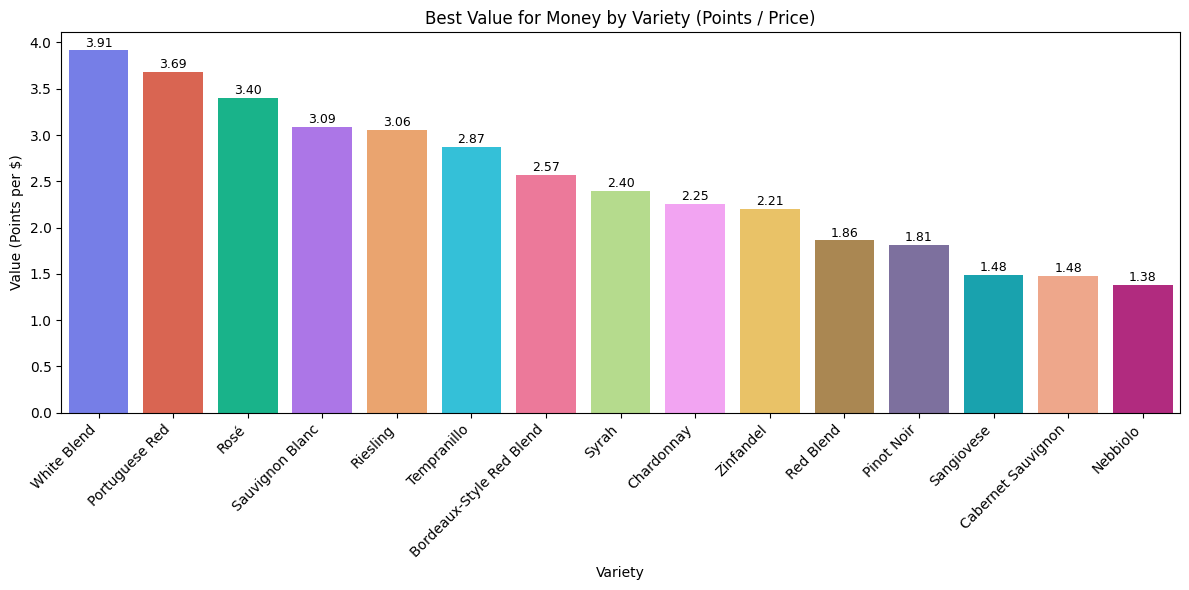

In [573]:
# Step 1: Group by variety to get count, mean points, and mean price
variety_stats = wines_df.groupby('variety').agg(
    count=('price', 'count'),
    avg_points=('points', 'mean'),
    avg_price=('price', 'mean')
).dropna()

# Step 2: Filter to only varieties with at least 20 wines
variety_stats = variety_stats[variety_stats['count'] >= 20]

# Step 3: Calculate value (points / price)
variety_stats['value'] = variety_stats['avg_points'] / variety_stats['avg_price']

# Step 4: Sort and select top 15
top_15_value_variety = variety_stats.sort_values(by='value', ascending=False).head(15)

# Custom colors (extend if needed)
custom_colors = [
    '#636EFA',  # blue
    '#EF553B',  # red-orange
    '#00CC96',  # teal
    '#AB63FA',  # purple
    '#FFA15A',  # orange
    '#19D3F3',  # light blue
    '#FF6692',  # pink
    '#B6E880',  # light green
    '#FF97FF',  # magenta
    '#FECB52',  # yellow
    '#B88A44',  # bronze
    '#7A68A6',  # deep violet
    '#00B7C7',  # cyan
    '#FFA07A',  # light salmon
    '#C71585'   # medium violet red
]

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_15_value_variety.index,
    y=top_15_value_variety['value'],
    palette=custom_colors[:len(top_15_value_variety)]
)

# Add value labels above each bar
for idx, val in enumerate(top_15_value_variety['value']):
    plt.text(
        x=idx,
        y=val + 0.01,
        s=f"{val:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.xticks(rotation=45, ha='right')
plt.title('Best Value for Money by Variety (Points / Price)')
plt.ylabel('Value (Points per $)')
plt.xlabel('Variety')
plt.tight_layout()
plt.show()


In [552]:
lowest_score = wines_df['points'].min()
wines_df[wines_df['points'] == lowest_score]

,country,description,designation,points,price,province,region_1,region_2,variety,winery,price_bin,value_score
725,US,"While light in color, this wine is flavorful a...",Saluté,85,15.0,California,Livermore Valley,Central Coast,Red Blend,Rubino Estates Winery,<20,5.666667
726,France,This pale rosé blend of Cabernet Sauvignon and...,Bélingard,85,9.0,Southwest France,Bergerac Rosé,Unknown,Rosé,Château Bélingard,<20,9.444444
727,France,This is the second label from this Gaillac est...,Les Petits Clément Merlot Duras,85,16.0,Southwest France,Côtes du Tarn,Unknown,Red Blend,Château Clément Termes,<20,5.312500
728,US,A hint of maple syrup in the aromas and flavor...,Unknown,85,15.0,California,California,California,Cabernet Sauvignon,Jack's House,<20,5.666667
729,France,"A blend of 30% Pinot Noir and 70% Gamay, this ...",Unknown,85,18.0,Burgundy,Coteaux Bourguignons,Unknown,Pinot Noir-Gamay,Joseph Drouhin,<20,4.722222
730,Italy,This informal red has a shy nose that eventual...,Unknown,85,9.0,Northeastern Italy,Delle Venezie,Unknown,Pinot Nero,Famiglia Cielo,<20,9.444444
731,Portugal,This is a light wine with plenty of acidity an...,Oceanus Touriga Nacional-Cabernet Sauvignon,85,11.0,Tejo,Unknown,Unknown,Portuguese Red,Fiuza,<20,7.727273
732,France,A light orange pink color sets the scene for a...,Pigmentum Malbec,85,12.0,Southwest France,Côtes du Lot,Unknown,Rosé,Georges Vigouroux,<20,7.083333
733,France,Named after the series of vineyard terraces th...,Les Terrasses,85,14.0,Southwest France,Cahors,Unknown,Malbec,Rigal,<20,6.071429
734,South Africa,"Fresh grass, gooseberry, lime leaf and a touch...",Unknown,85,10.0,Western Cape,Unknown,Unknown,Sauvignon Blanc,Long Neck,<20,8.500000


<Axes: title={'center': 'Price vs Points'}, xlabel='price', ylabel='points'>

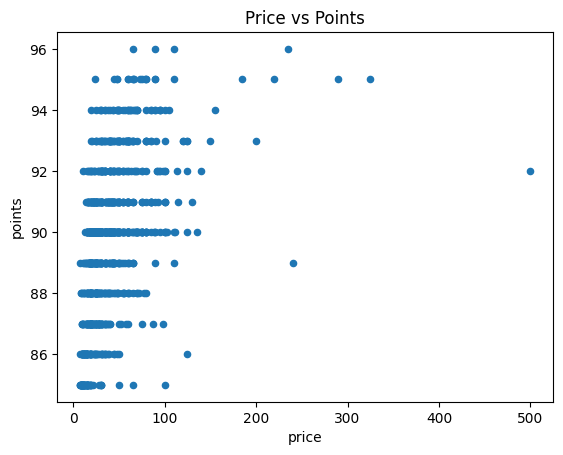

In [472]:
# Plot relationship between wine points and price
wines_df.plot.scatter(x='price', y='points', title='Price vs Points')

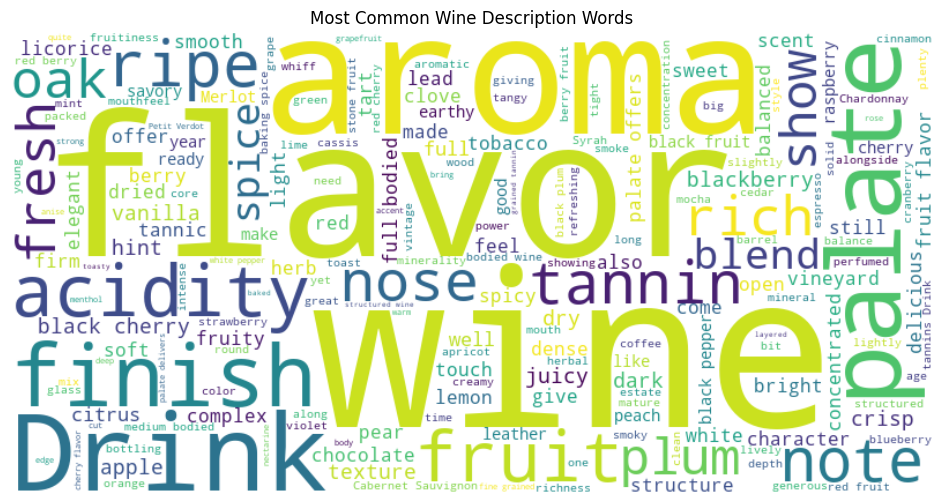

In [516]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

descriptions = " ".join(wines_df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=set(stopwords.words('english'))).generate(descriptions)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Wine Description Words')
plt.show()


In [551]:
wines_df[wines_df['points'] == 95].shape[0]


21

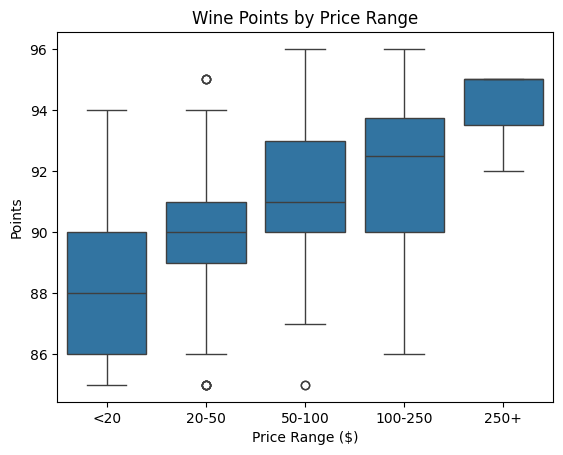

In [474]:
# Create price bins for better readability
wines_df['price_bin'] = pd.cut(wines_df['price'], bins=[0, 20, 50, 100, 250, 1000], labels=['<20', '20-50', '50-100', '100-250', '250+'])

sns.boxplot(data=wines_df, x='price_bin', y='points')
plt.title('Wine Points by Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Points')
plt.show()

In [475]:
# See relationship between points and price
alt.Chart(wines_df).mark_point().encode(
    x='price',
    y='points',
    color='country',
    tooltip=['variety', 'winery']
)

alt.Chart(...)

In [476]:
import altair as alt

alt.Chart(wines_df).mark_point(opacity=0.4).encode(
    x=alt.X('price', scale=alt.Scale(type='log'), title='Price (log scale)'),
    y=alt.Y('points', scale=alt.Scale(domain=[85, 100]), title='Points (85–100)'),
    color='country',
    tooltip=['variety', 'winery', 'price', 'points']
).properties(
    title='Wine Price vs Points (Filtered Y-Axis: 85–100)'
)


alt.Chart(...)

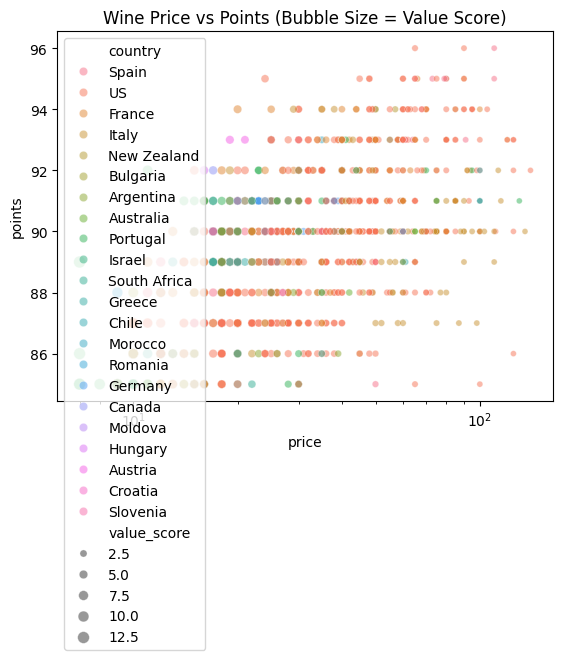

In [478]:
# Find top value wines (based on points vs price of wine)
wines_df['value_score'] = wines_df['points'] / wines_df['price']

filtered_df = wines_df[(wines_df['price'] > 5) & (wines_df['price'] < 150)]

top_value_wines = filtered_df.sort_values('value_score', ascending=False).head(10)
top_value_wines[['designation', 'price', 'points', 'value_score']]

sns.scatterplot(data=filtered_df, x='price', y='points', size='value_score', hue='country', alpha=0.5)
plt.title('Wine Price vs Points (Bubble Size = Value Score)')
plt.xscale('log')
plt.show()


In [479]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.
